# Pretrained Models Test for Imparied dataset


### Import Libraries

In [17]:
from torchsig.models.iq_models.efficientnet.efficientnet import efficientnet_b0, efficientnet_b2, efficientnet_b4
from xcit.xcit import xcit_nano, xcit_tiny12
from torchsig.datasets.sig53 import Sig53
from Train_evaluate import *
import torchsig.transforms as ST
from torch.utils.data import DataLoader
import torch.nn.functional as F



In [10]:

def model_params(MODEL):
 model = MODEL(
    pretrained=False,
 )

 trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
 print("Total number of trainable parameters: {:.2f}M".format(trainable_params / 1e6))

In [11]:
model_params(efficientnet_b2)

Total number of trainable parameters: 7.59M


In [12]:
model_params(efficientnet_b4)

Total number of trainable parameters: 17.27M


In [13]:
model_params(efficientnet_b0)

Total number of trainable parameters: 3.95M


In [15]:
model_params(xcit_nano)

Total number of trainable parameters: 2.86M


In [16]:
model_params(xcit_tiny12)

Total number of trainable parameters: 6.36M


----
### Data reading

In [18]:
# Specify Sig53 Options
root = "../../../../data/torchsig/sig53/"
train = False
impaired = True
class_list = list(Sig53._idx_to_name_dict.values())
transform = ST.Compose([
    ST.RandomPhaseShift(phase_offset=(-1, 1)),
    ST.Normalize(norm=np.inf),
    ST.ComplexTo2D(),
])
target_transform = ST.DescToClassIndex(class_list=class_list)


# Instantiate the Sig53 Clean Validation Dataset
train = False
sig53_clean_val = Sig53(
    root=root,
    train=train,
    impaired=impaired,
    transform=transform,
    target_transform=target_transform,
    use_signal_data=True,
)

# Retrieve a sample and print out information to verify
idx = np.random.randint(len(sig53_clean_val))
data, label = sig53_clean_val[idx]
print("Dataset length: {}".format(len(sig53_clean_val)))
print("Data shape: {}".format(data.shape))
print("Label Index: {}".format(label))
print("Label Class: {}".format(Sig53.convert_idx_to_name(label)))

Dataset length: 9964
Data shape: (2, 4096)
Label Index: 28
Label Class: 2gmsk


----
### Dataloaders

In [19]:
test_dataloader = DataLoader(
    dataset=sig53_clean_val,
    batch_size=16,
    num_workers=8,
    shuffle=False,
    drop_last=True,
)

In [20]:
class_family_dict = {
        "4ask": "ask",
        "8ask": "ask",
        "16ask": "ask",
        "32ask": "ask",
        "64ask": "ask",
        "ook": "pam",
        "4pam": "pam",
        "8pam": "pam",
        "16pam": "pam",
        "32pam": "pam",
        "64pam": "pam",
        "2fsk": "fsk",
        "2gfsk": "fsk",
        "2msk": "fsk",
        "2gmsk": "fsk",
        "4fsk": "fsk",
        "4gfsk": "fsk",
        "4msk": "fsk",
        "4gmsk": "fsk",
        "8fsk": "fsk",
        "8gfsk": "fsk",
        "8msk": "fsk",
        "8gmsk": "fsk",
        "16fsk": "fsk",
        "16gfsk": "fsk",
        "16msk": "fsk",
        "16gmsk": "fsk",
        "bpsk": "psk",
        "qpsk": "psk",
        "8psk": "psk",
        "16psk": "psk",
        "32psk": "psk",
        "64psk": "psk",
        "16qam": "qam",
        "32qam": "qam",
        "32qam_cross": "qam",
        "64qam": "qam",
        "128qam_cross": "qam",
        "256qam": "qam",
        "512qam_cross": "qam",
        "1024qam": "qam",
        "ofdm-64": "ofdm",
        "ofdm-72": "ofdm",
        "ofdm-128": "ofdm",
        "ofdm-180": "ofdm",
        "ofdm-256": "ofdm",
        "ofdm-300": "ofdm",
        "ofdm-512": "ofdm",
        "ofdm-600": "ofdm",
        "ofdm-900": "ofdm",
        "ofdm-1024": "ofdm",
        "ofdm-1200": "ofdm",
        "ofdm-2048": "ofdm",
    }

----
### Initiate Model
Below, we load a pretrained EfficientNet-B0 model, and then conform it to a PyTorch LightningModule for training.

In [5]:
model = efficientnet_b0(
    pretrained=True,
    path="efficientnet_b0.pt",
)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)

----
### Evaluation

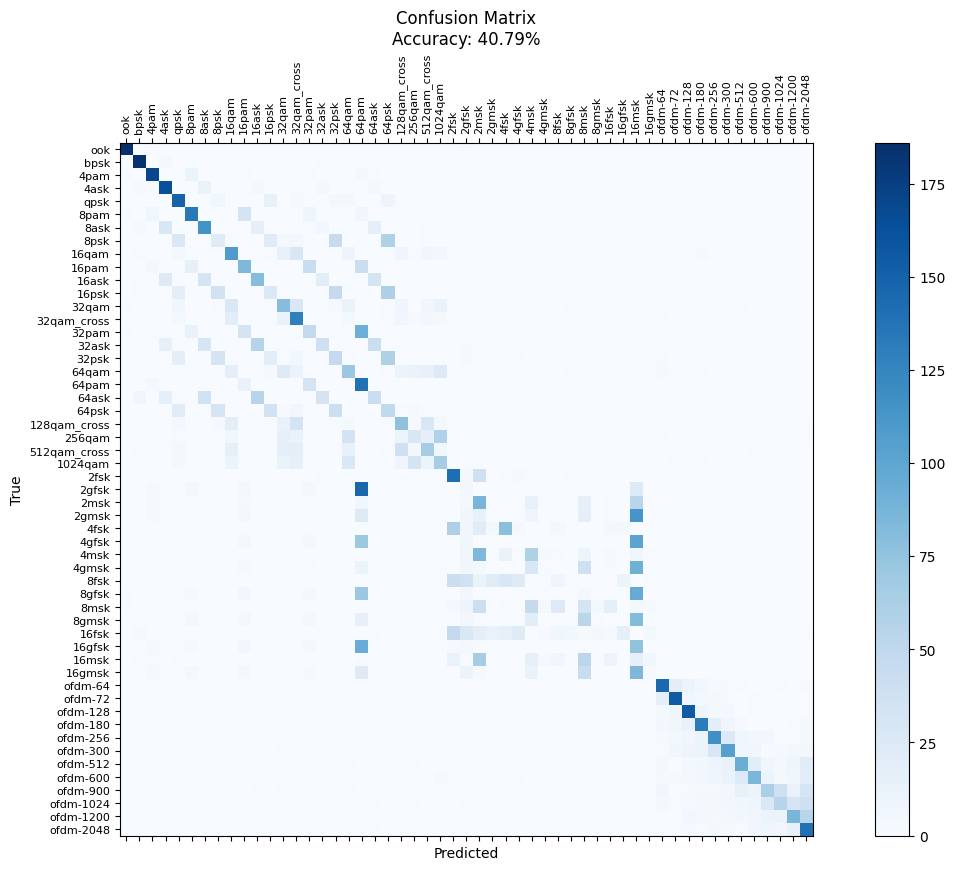

In [6]:
all_predictions, all_labels = evaluate_pretrained(model, test_dataloader, device, class_list)

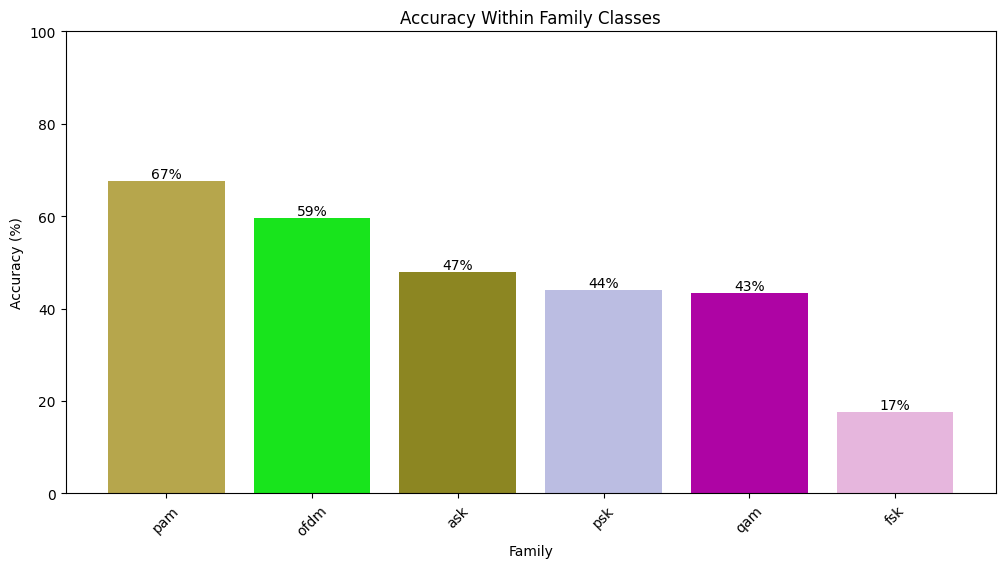

In [8]:
evaluate_family_accuracy(all_predictions, all_labels, class_list, class_family_dict)

## EfficientNet B2

In [9]:
model = efficientnet_b2(
    pretrained=True,
    path="efficientnet_b2.pt",
)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)

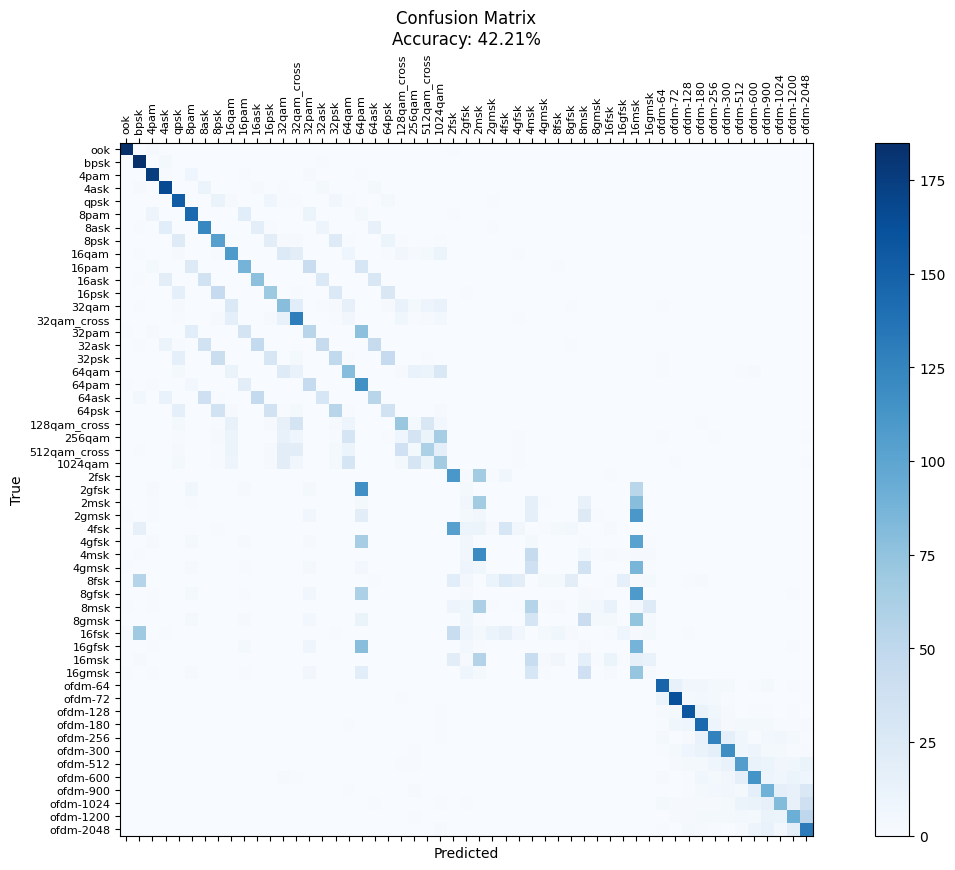

In [10]:
all_predictions, all_labels = evaluate_pretrained(model, test_dataloader, device, class_list)

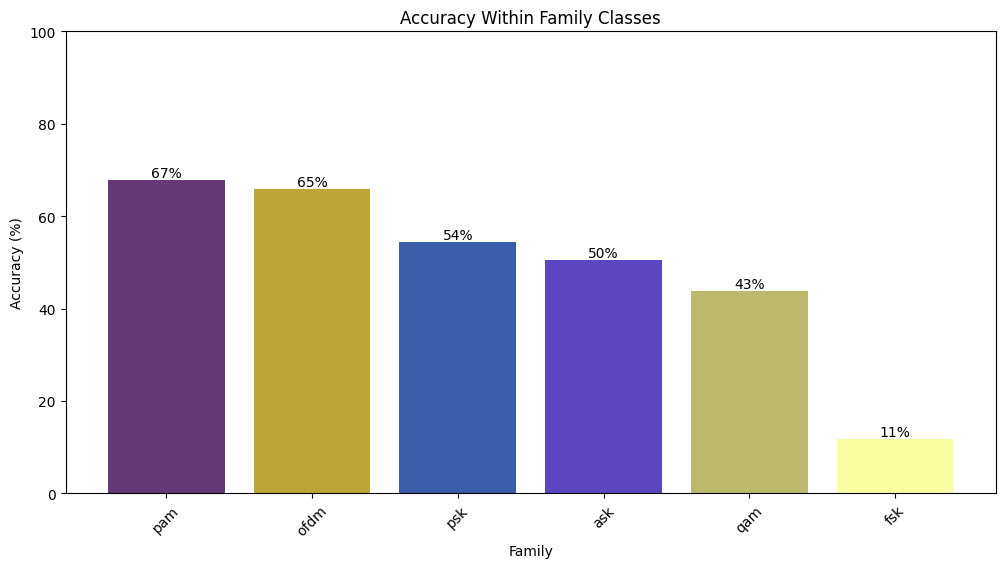

In [11]:
evaluate_family_accuracy(all_predictions, all_labels, class_list, class_family_dict)


## EfficientNet B4

In [12]:
model = efficientnet_b4(
    pretrained=True,
    path="efficientnet_b4.pt",
)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)

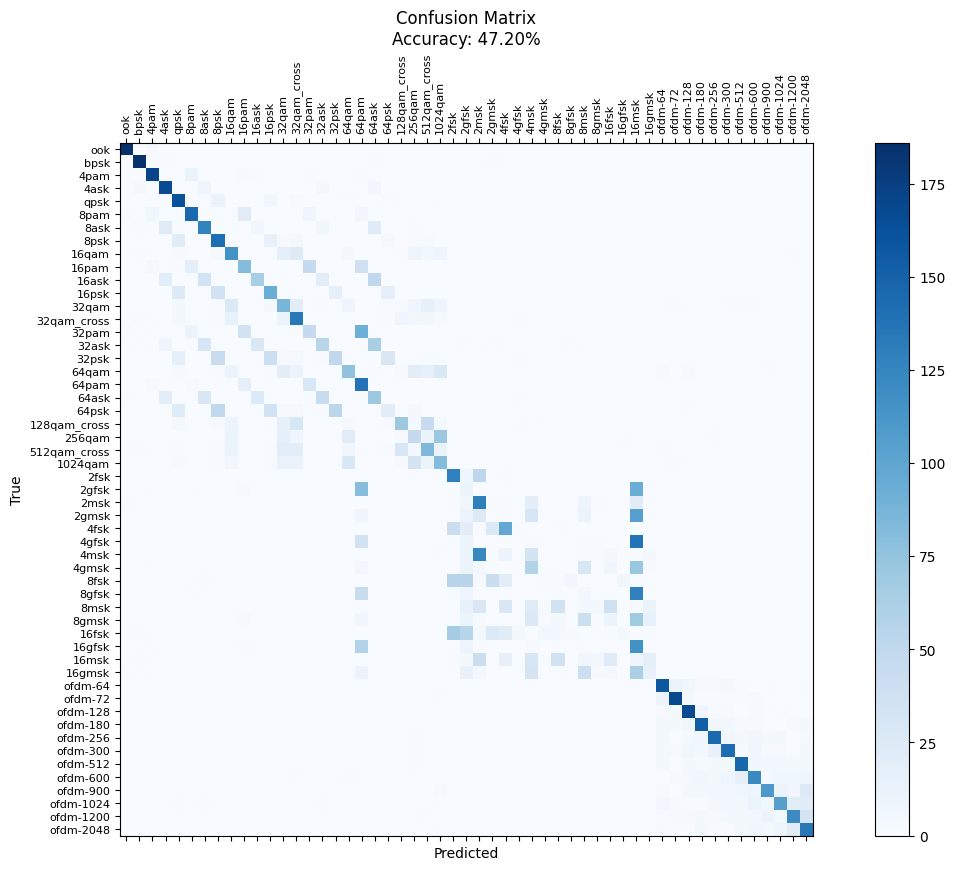

In [13]:
all_predictions, all_labels = evaluate_pretrained(model, test_dataloader, device, class_list)

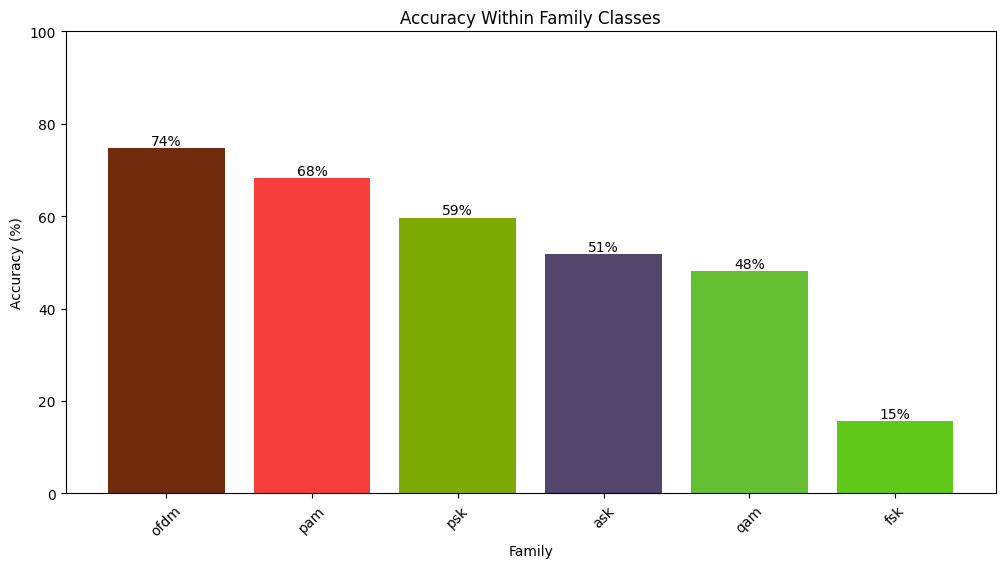

In [14]:
evaluate_family_accuracy(all_predictions, all_labels, class_list, class_family_dict)


## XCiT

###  XCiT Nano

In [21]:
model = xcit_nano(
    pretrained=True,
    path="xcit_nano.pt",
)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)

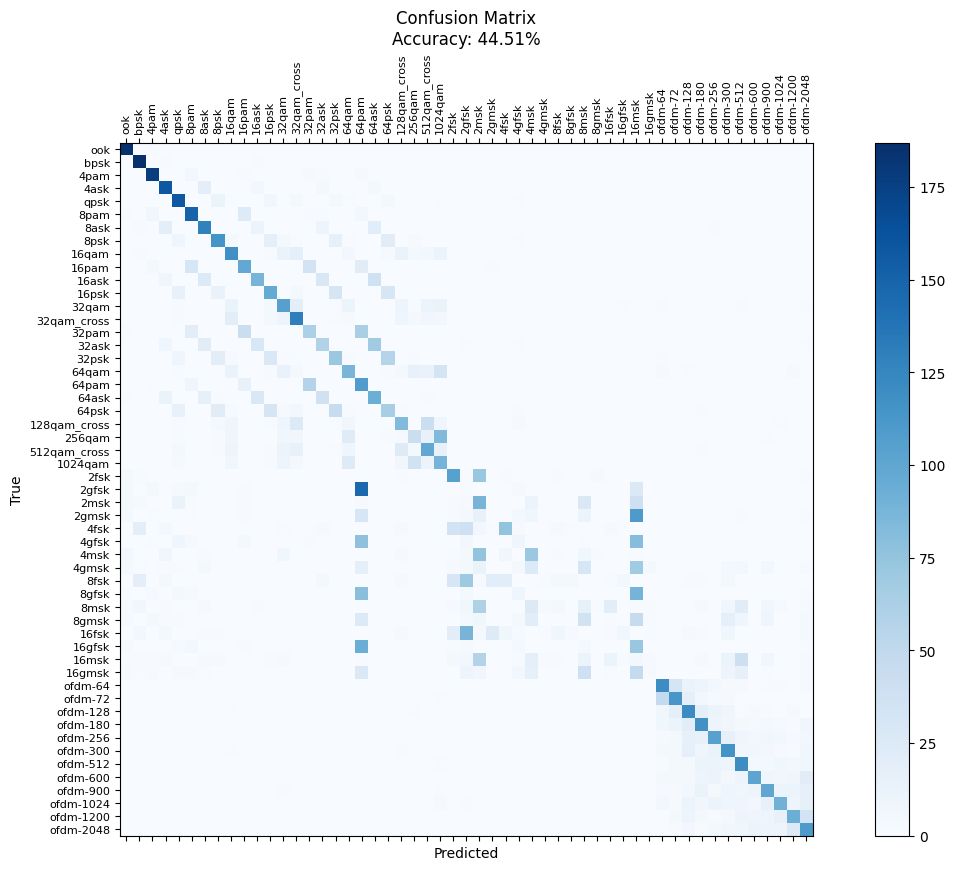

In [22]:
all_predictions, all_labels = evaluate_pretrained(model, test_dataloader, device, class_list)

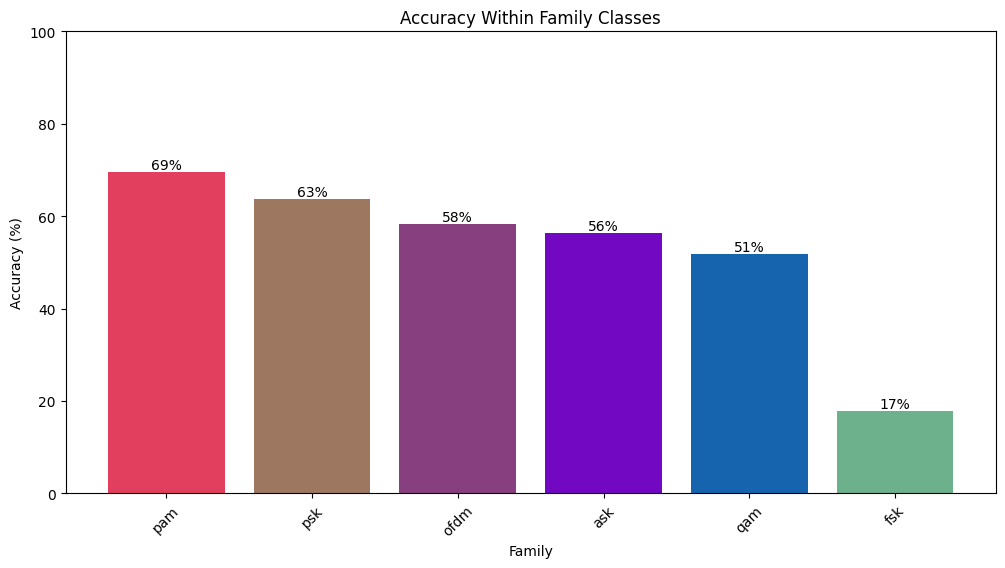

In [23]:
evaluate_family_accuracy(all_predictions, all_labels, class_list, class_family_dict)


###  XCiT Tiny

In [24]:
model = xcit_tiny12(
    pretrained=True,
    path="xcit_tiny.pt",
)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)

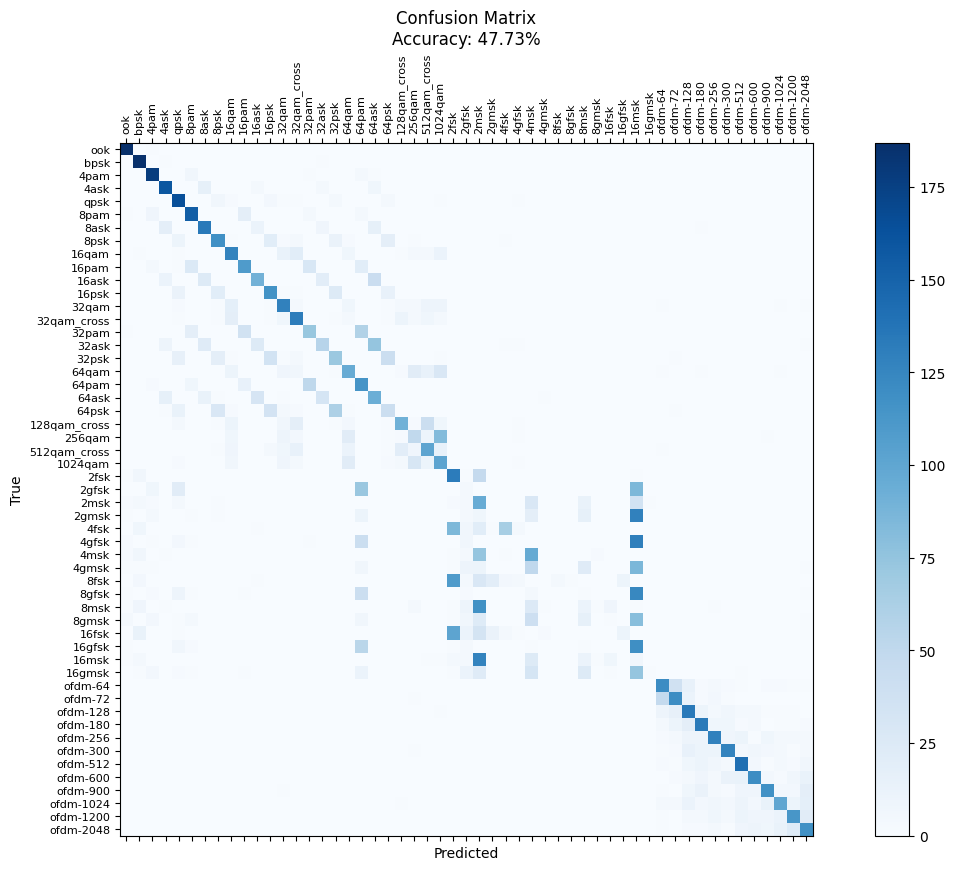

In [25]:
all_predictions, all_labels = evaluate_pretrained(model, test_dataloader, device, class_list)

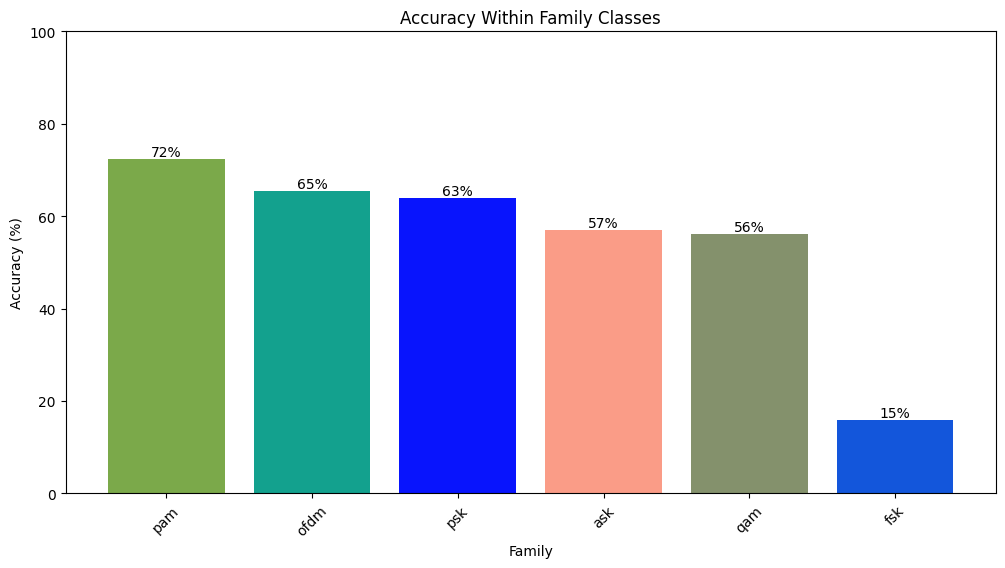

In [26]:
evaluate_family_accuracy(all_predictions, all_labels, class_list, class_family_dict)
